### 1.  **链式法则**
假设 $X\in \mathbb{R}^m$，$Y\in \mathbb{R}^n$，$g$ 是从 $\mathbb{R}^m$ 到 $\mathbb{R}^n$ 的映射，$f$ 是从 $\mathbb{R}^n$ 到 $\mathbb{R}$ 的映射。如果$Y = g(X)$ 并且 $Z = f(Y)$，那么

$$ \frac{\partial Z}{\partial X_i} = \sum_j \frac{\partial Z}{\partial Y_j}\frac{\partial Y_j}{\partial X_i} $$

使用向量记法，可以等价地写成

$$ \nabla_X Z=(\frac{\partial Y}{\partial X})^\top \nabla_Y Z$$

其中，$\frac{\partial Y}{\partial X}$ 是 $g$ 的 $n\times m$ 的 Jacobian 矩阵。

### 前向传播

首先给出典型神经网络中的前向传播和**代价函数**的计算过程。代价函数等于损失函数加上正则项 $\Omega(\theta)$，其中 $\theta$ 包含所有参数（权重和偏置），损失函数 $L(y, t)$ 取决于神经网络输出 $ y$ 和目标 $t$。

$$ J = L(y, t) + \lambda \Omega(\theta) $$

Require: 网络深度 $l$

Require: $W^{(i)}, i\in {1,...,l}$，模型的权重矩阵

Require: $b^{(i)}, i\in {1,...,l}$，模型的偏置参数

Require: $x$，程序的输入

Require: $t$，目标输出

$z^{(0)} = x$

$ {\rm for \;} k=1,...,l {\rm \; do}$

$ \qquad a^{(k)} = W^{(k)}z^{(k-1)} + b^{(k)}$

$ \qquad z^{(k)} = f(a^{(k)})$

$ {\rm end \; for} $

$y = z^{(l)}$

$ J = L(y, t) + \lambda \Omega(\theta) $

### 反向传播
$ g \leftarrow \nabla_{y}J = \nabla_{y}L(y, t) $

$ {\rm for \;} k=l,l-1,...,1 {\rm \; do}$

     将关于层输出的梯度转换为非线性激活输入前的梯度：

$ \qquad g \leftarrow \nabla_{a^{(k)}}J = g f'(a^{(k)})$


     计算关于权重和偏置的梯度：
$ \qquad \nabla_{W^{(k)}} J = g z^{(k-1)\top} + \lambda \nabla_{W^{(k)}}\Omega(\theta)$

$ \qquad \nabla_{b^{(k)}} J = g + \lambda \nabla_{b^{(k)}}\Omega(\theta)$

     关于下一更低层的隐藏层传播梯度：
$ \qquad g \leftarrow \nabla_{z^{(k-1)}}J = W^{(k)\top}g$

$ {\rm end \; for} $

### 2. **计算图(Computational Graph）**
### 2.1 用计算图求解
对于方程 $ p = x + y $ 的计算图如下：

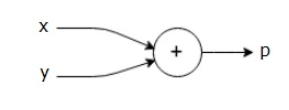

正向传播是从计算图出发点到结束点的传播。而从右向左的传播被称为反向传播（backward propagation），它将在接下来的导数计算中发挥重要作用。

### 2.2 为何用计算图解题
- 无论全局是多么复杂的计算，都可以通过局部计算使各个节点致力于简单的计算，从而简化问题。


- 利用计算图可以将中间的计算结果全部保存起来。


- 可以通过反向传播高效计算导数。

这里，假设我们想知道苹果价格的上涨会在多大程度上影响最终的支付金额，即求“支付金额关于苹果的价格的导数”。设苹果的价格为 $x$，支付金额为 $L$，则相当于求 $\frac{\partial L}{\partial x}$。导数的数值可以通过计算图的反向传播求出来。


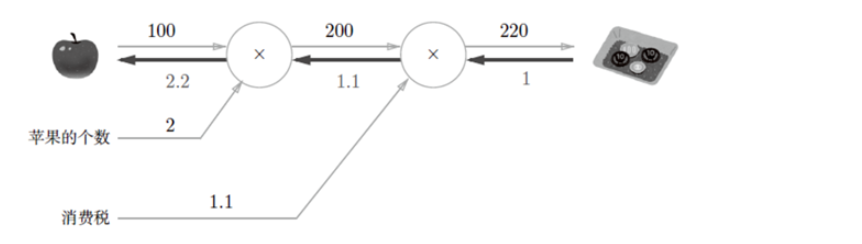

从这个结果中可知，“支付金额关于苹果的价格的导数”的值是 2.2。这意味着，如果苹果的价格上涨 1 元，最终的支付金额会增加 2.2 元。

计算中途求得的导数的结果（中间传递的导数）可以被共享，从而可以高效地计算多个导数。

综上，计算图的优点是，可以通过正向传播和反向传播高效地计算各个变量的导数值。

### 2.3. 计算图中的链式法则

对于$$ z= t^2 $$
$$ t = x + y $$

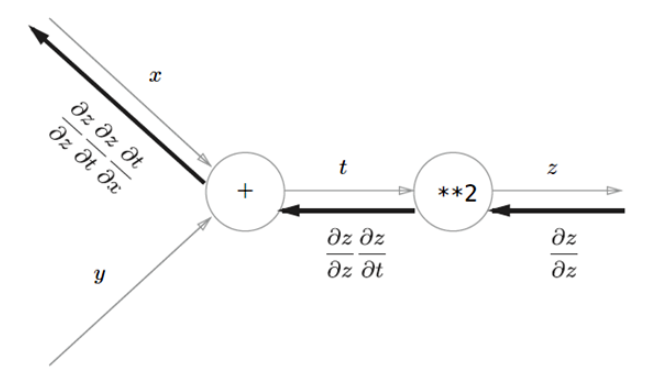

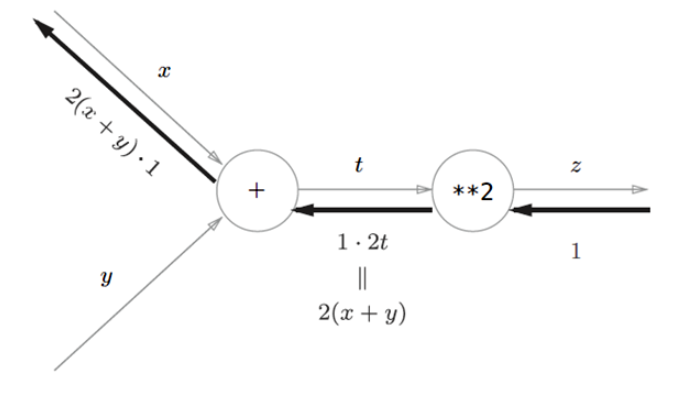

### 3. **反向传播**
### 3.1 加法层的反向传播
以 $z = x + y$ 为对象，观察它的反向传播。$z = x + y$ 的导数可解析性地计算出来。

$$ \frac{\partial z}{\partial x} = 1$$

$$ \frac{\partial z}{\partial y} = 1$$
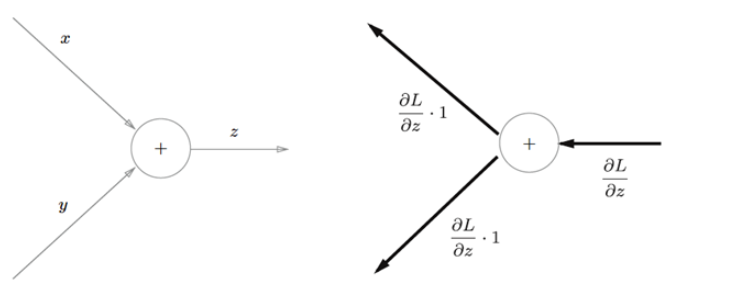

In [2]:
# 接下来，我们实现加法节点的加法层，如下所示：
class AddLayer:
    def __init__(self):
        pass

    # 正向传播
    def forward(self, x, y):
        return x + y

    # 反向传播
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        # return dout, dout
        return dx, dy

### 3.2 乘法层的反向传播
这里我们考虑 $z = xy$。这个式的导数用下式表示：

$$ \frac{\partial z}{\partial x} = y$$

$$ \frac{\partial z}{\partial y} = x$$
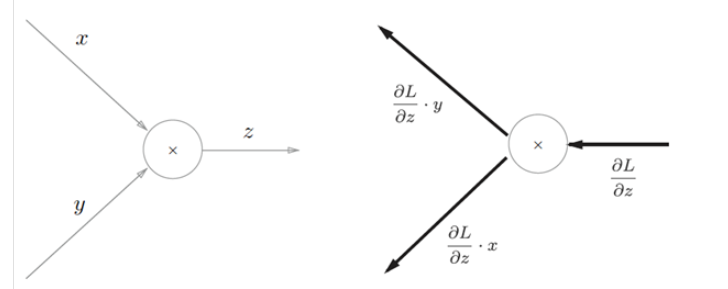

In [3]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    # 正向传播
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y

    # 反向传播
    def backward(self, dout):
        dx = dout * self.y # 翻转x和y
        dy = dout * self.x
        return dx, dy

现在我们使用 MulLayer 类实现前面的购买苹果的例子：
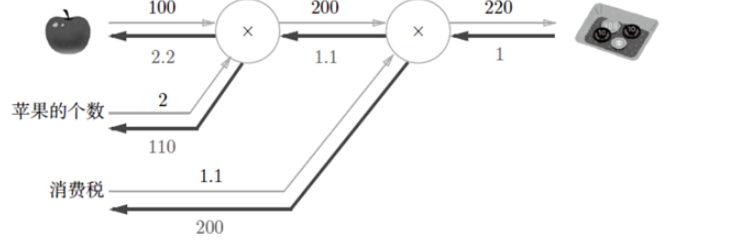

In [4]:
apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price) # 220

220.00000000000003


In [5]:
# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
print(dapple_price, dtax)

dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num) # 2.2 110

1.1 200
2.2 110.00000000000001


### 3.3 激活函数层的反向传播
现在，我们将计算图的思路应用到神经网络中。这里，我们把构成神经网络的层实现为一个类。先来实现激活函数的 ReLU 层和 Sigmoid 层。

#### 3.3.1 ReLU层
激活函数ReLU（Rectified Linear Unit）由下式表示，

$$ y = \begin{cases}
x&x > 0 \\
0&x <= 0
\end{cases} $$

可以求出 $y$ 关于 $x$ 的导数，

$$ \frac{\partial y}{\partial x} = \begin{cases}
1&x > 0 \\
0&x <= 0
\end{cases} $$

如果正向传播时的输入 $x$ 大于0，则反向传播会将上游的值原封不动地传给下游。反过来，如果正向传播时的 $x$ 小于等于0，则反向传播中传给下游的信号将停在此处。计算图如图所示，

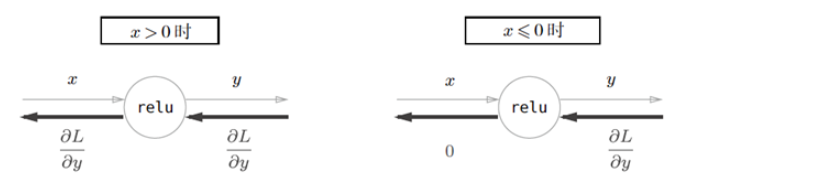

现在我们来实现ReLU层。在神经网络的层的实现中，一般假定 forward() 和 backward() 的参数是NumPy数组。

In [6]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        return dout

Relu 类有实例变量 mask，这个变量是由 True/False 构成的 NumPy 数组，它会把正向传播时的输入的元素中小于等于 0 的地方保存为 True，其它地方（大于 0 的元素）保存为 False。

In [9]:
import numpy as np
x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )

Relu().forward(x)

array([[1., 0.],
       [0., 3.]])

#### 3.3.2 Sigmoid层

sigmoid 函数公式为
$$ y = \frac{1}{1 + \exp (-x)} $$

用计算图表示的话如图所示，

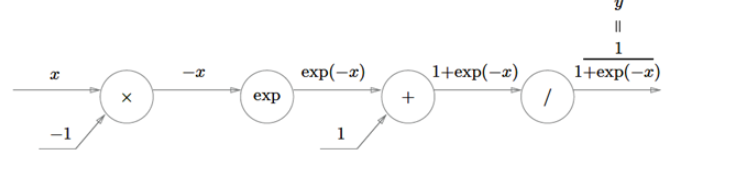

下面我们进行计算图的反向传播。Sigmoid层的反向传播计算图为：

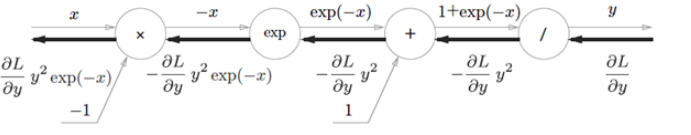

Sigmoid 层的反向传播输出为 $\frac{\partial L}{\partial y}y^2\exp(-x)$，可以进一步整理如下：

$$\frac{\partial L}{\partial y}y^2\exp(-x) = \frac{\partial L}{\partial y}y\frac{1}{1 + \exp (-x)}\exp(-x) = \frac{\partial L}{\partial y}y(1-y)$$

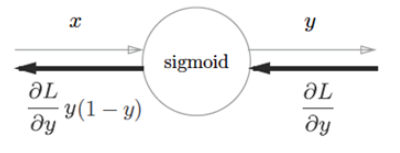

In [10]:
# 用 Python 代码实现sigmoid层：
class Sigmoid:
    def __init__(self):
        self.out = None    # 保存正向传播结果
        
    def forward(self, x):
        self.out = 1 / (1 + np.exp(-x))
        return self.out

    def backward(self, dout):
        return dout * self.out * (1.0 - self.out)

 ### 3.4 **全连接层**

In [11]:
# 一个简单的神经网络全连接层计算：
X = np.random.rand(2) # 输入
W = np.random.rand(2,3) # 权重
B = np.random.rand(3) # 偏置

Y = np.dot(X, W) + B

之前我们见到的计算图中各个节点间流动的是标量，而这个例子中各个节点间传播的是矩阵。

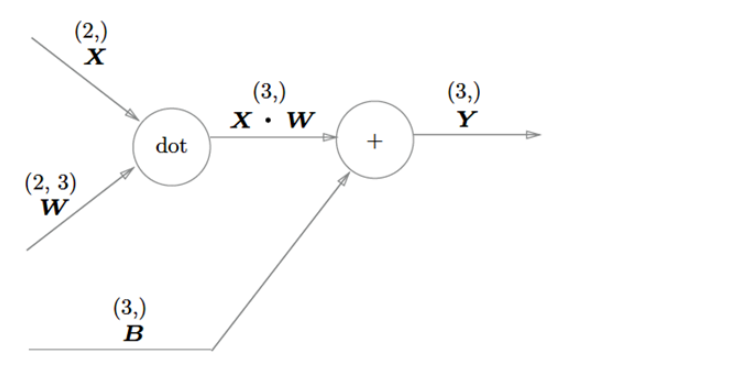

以矩阵为对象的反向传播，按矩阵的各个元素进行计算时，步骤和以标量为对象的计算图相同。

$$ \frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\cdot W^T $$
$$ \frac{\partial L}{\partial W} = X^T\cdot \frac{\partial L}{\partial Y} $$

神经网络计算图的反向传播：


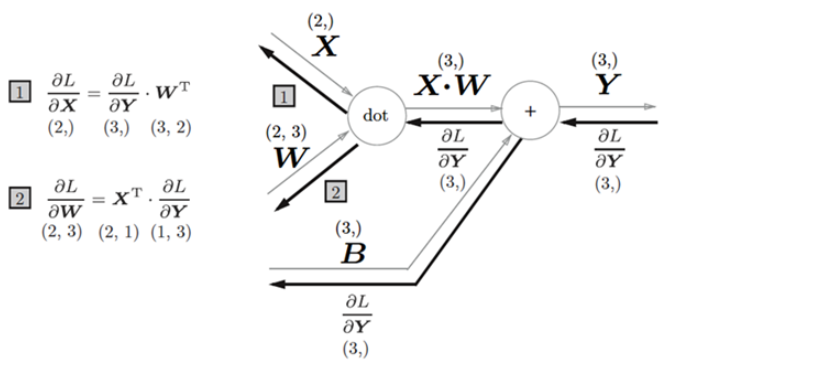

现在我们考虑 N 个数据一起进行正向传播的情况，也就是批版本的全连接层。先给出批版本的全连接层的计算图，

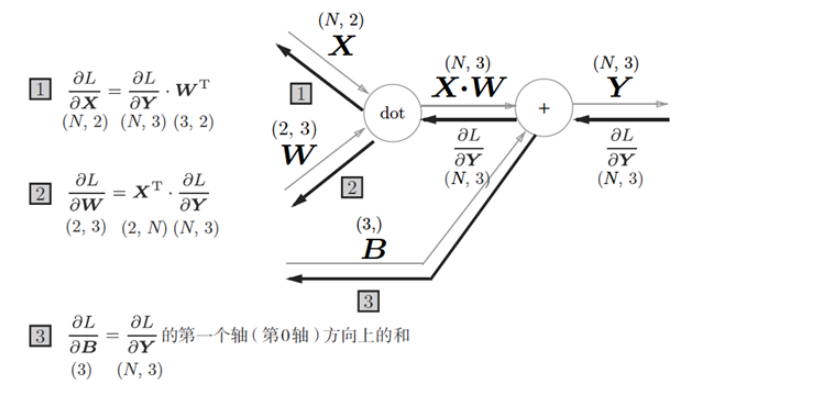

与之前不同的是，现在输入 $X$ 的形状是 (N, 2)。

In [12]:
class FullyConnected:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

### 3.5 **Softmax-with-loss层**
下面来实现 Softmax 层。考虑到这里也包含作为损失函数的交叉熵误差（cross entropy error），所以称为“Softmax-with-Loss 层”。Softmax-with-Loss 层（Softmax函数和交叉熵误差）的计算图如图所示。

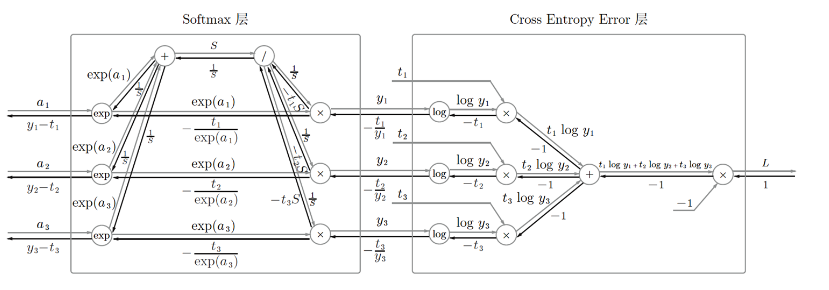

Softmax 层将输入值归一化（将输出值的和调整为1）之后再输出。

### 3.5.1 正向传播

softmax 函数可由下式表示

$$ y_k = \frac{\exp (a_k)}{\sum_{i=1}^n \exp (a_i)} $$

在Softmax层的计算图中，指数的和记做 $S$，最终的输出记为 $(y_1,y_2,y_3)$

交叉熵误差(cross entropy error)可由下式表示，

$$ L = -\sum_k t_k \log y_k$$

交叉熵误差层的最终输出记为 $ -(t_1 \log y_1 + t_2 \log y_2 + t_3 \log y_3) $

In [14]:
# 现在来进行Softmax-with-Loss 层的实现，实现代码如下所示
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 损失
        self.y = None # softmax的输出
        self.t = None # 标签数据（one-hot vector）
    
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

### 4. **误差反向传播的实现**
#### 4.1 神经网络的实现

In [15]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 生成层
        self.layers = OrderedDict()   # 有序字典
        self.layers['FC1'] = FullyConnected(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['FC2'] = FullyConnected(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 :
            t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:输入数据, t:标签数据
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 设定
        grads = {}
        grads['W1'] = self.layers['FC1'].dW
        grads['b1'] = self.layers['FC1'].db
        grads['W2'] = self.layers['FC2'].dW
        grads['b2'] = self.layers['FC2'].db
        return grads

In [16]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

### 4.2 **使用误差反向传播法的学习**

In [17]:
def change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [18]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 损失
        self.y = None # softmax的输出
        self.t = None # 标签数据（one-hot vector）

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 监督数据是one-hot-vector的情况
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx